### Required Try-It Activity 14.1: Generating Overfit Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [28]:
data = pd.read_csv('Whickham.txt')

In [29]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [30]:
X = data[['smoker', 'age']]
y = data['outcome']

In [31]:
#Convert Smoker and Outcome field to numerical
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
data['outcome'] = le.fit_transform(data['outcome'])
data['smoker'] = le.fit_transform(data['smoker'])

In [33]:
#Splitting data into training and testing 
from sklearn.model_selection import train_test_split

In [34]:
X = data[['smoker', 'age']]
y = data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:

import numpy as np
from sklearn.metrics import accuracy_score

# Define the range of max_depth to test
max_depths = range(1, 10)

# Initialize empty lists to collect accuracy scores
train_accuracies = []
test_accuracies = []


# Train decision tree models for each depth
for depth in max_depths:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtc.fit(X_train, y_train)
    y_train_pred = dtc.predict(X_train)
    y_test_pred = dtc.predict(X_test)

# calculate and append accuracy for each max_depths
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))


### Plotting average accuracy vs depth

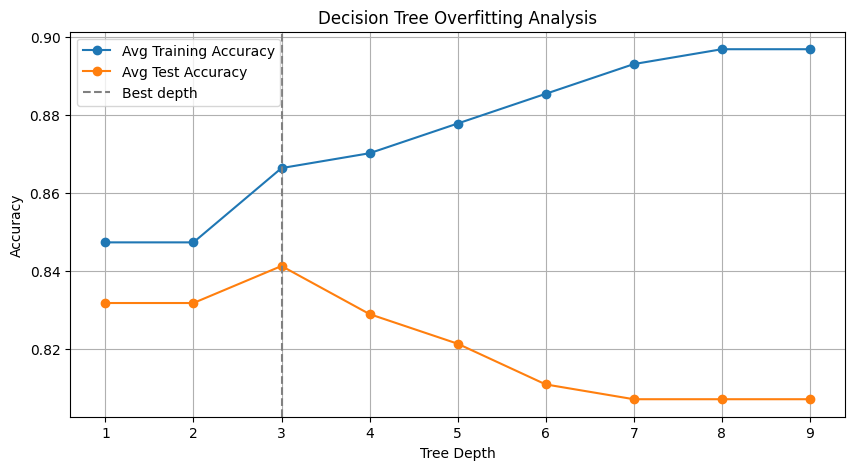

In [65]:
avg_train_scores = [np.mean(train_accuracies[depth - 1]) for depth in max_depths]
avg_test_scores = [np.mean(test_accuracies[depth - 1]) for depth in max_depths]

plt.figure(figsize=(10, 5))
plt.plot(max_depths, avg_train_scores, label='Avg Training Accuracy', marker='o')
plt.plot(max_depths, avg_test_scores, label='Avg Test Accuracy', marker='o')

plt.axvline(x=max_depths[np.argmax(avg_test_scores)], color='gray', linestyle='--', label='Best depth')

plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Overfitting Analysis')
plt.legend()
plt.grid(True)
plt.show()

### Repeat the above process with different splits of the data to determine at what depth the tree begins to overfit.

In [66]:
test_sizes = [0.2, 0.4, 0.6, 0.8]
max_depths = range(1, 10)

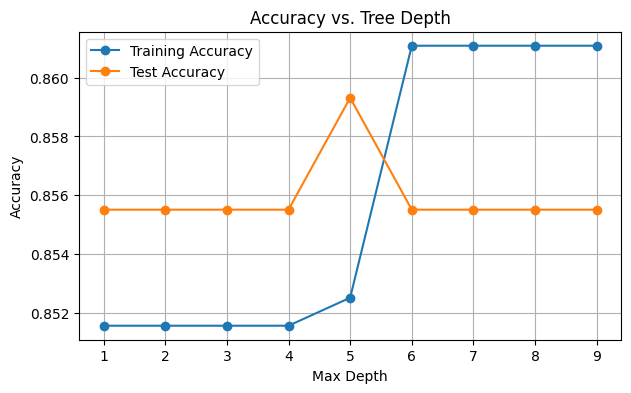

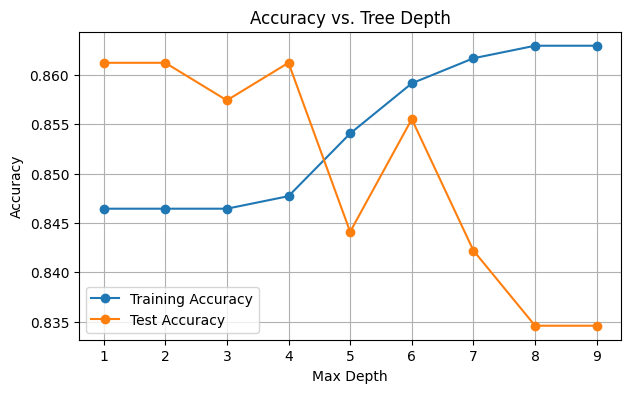

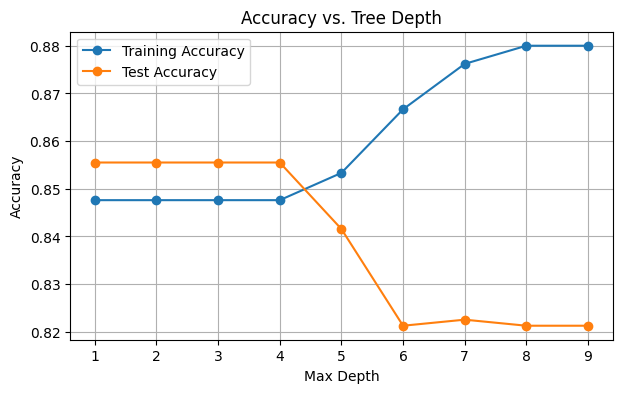

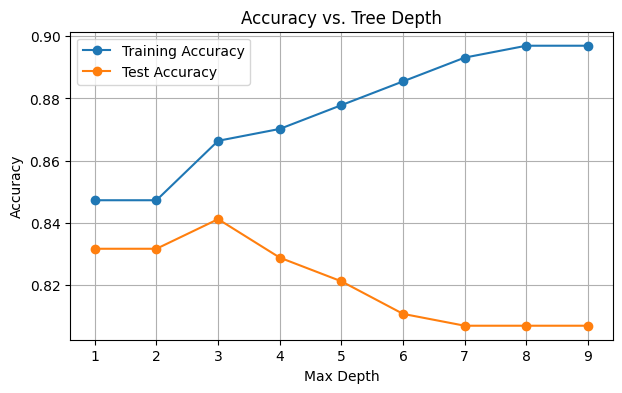

In [67]:
# Dictionary to store accuracies for different test sizes
accuracies = {}

for test_size in test_sizes:
    # Split the data according to the current test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize empty lists to collect accuracy scores
    train_accuracies = []
    test_accuracies = []

    # Train decision tree models for each depth
    for depth in max_depths:
        dtc = DecisionTreeClassifier(max_depth=depth, random_state=42)
        dtc.fit(X_train, y_train)
        y_train_pred = dtc.predict(X_train)
        y_test_pred = dtc.predict(X_test)
        
        # Calculate and append accuracies
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Create Accuracies data dictionary
    accuracies[test_size] = {'train': train_accuracies, 'test': test_accuracies}
    plt.figure(figsize=(7, 4))
    plt.plot(max_depths, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Tree Depth')
    plt.legend()
    plt.grid(True)
    plt.show()

### Overfitting Analysis
#### 1. Training accuracy increases with tree depth, approaching 100% - a classic sign of potential overfitting.
#### 2. Test accuracy peaks around depth 3–5 and declines afterward, indicating the model begins to overfit beyond this point.

### Interpretation
#### Depths > 5 result in memorizing training data but reduce generalization to new patients.
#### The gap between training and test accuracy widens after this point - a clear signal of overfitting.



In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': list(range(1, 11))
}


In [48]:
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=9, random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy')

In [50]:
results = grid_search.cv_results_

In [52]:
results_df = pd.DataFrame(results)

In [53]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002153,0.001101,0.001317,0.000495,1,{'max_depth': 1},0.811321,0.849057,0.846154,0.769231,...,0.835922,0.044596,3,0.851675,0.846890,0.847619,0.866667,0.833333,0.849237,0.010684
1,0.001475,0.000083,0.001095,0.000069,2,{'max_depth': 2},0.811321,0.849057,0.846154,0.769231,...,0.835922,0.044596,3,0.851675,0.846890,0.847619,0.866667,0.833333,0.849237,0.010684
2,0.001334,0.000170,0.001012,0.000120,3,{'max_depth': 3},0.811321,0.886792,0.865385,0.788462,...,0.858853,0.054776,1,0.851675,0.861244,0.866667,0.885714,0.847619,0.862584,0.013390
3,0.001022,0.000061,0.000723,0.000028,4,{'max_depth': 4},0.849057,0.849057,0.769231,0.788462,...,0.839623,0.060489,2,0.870813,0.866029,0.885714,0.890476,0.852381,0.873083,0.013752
4,0.000964,0.000057,0.000701,0.000072,5,{'max_depth': 5},0.849057,0.867925,0.730769,0.730769,...,0.824165,0.082387,5,0.875598,0.880383,0.900000,0.900000,0.861905,0.883577,0.014717
5,0.000887,0.000094,0.000609,0.000004,6,{'max_depth': 6},0.849057,0.849057,0.711538,0.711538,...,0.808853,0.083929,7,0.889952,0.894737,0.914286,0.909524,0.871429,0.895985,0.015226
6,0.000871,0.000095,0.000624,0.000021,7,{'max_depth': 7},0.849057,0.849057,0.750000,0.692308,...,0.812700,0.081550,6,0.899522,0.904306,0.914286,0.919048,0.871429,0.901718,0.016657
7,0.000910,0.000056,0.000647,0.000028,8,{'max_depth': 8},0.849057,0.849057,0.730769,0.692308,...,0.808853,0.084805,7,0.904306,0.904306,0.919048,0.919048,0.876190,0.904580,0.015651
8,0.000889,0.000105,0.000632,0.000029,9,{'max_depth': 9},0.811321,0.830189,0.750000,0.692308,...,0.801379,0.077815,10,0.913876,0.909091,0.919048,0.919048,0.880952,0.908403,0.014217
9,0.000862,0.000041,0.000680,0.000104,10,{'max_depth': 10},0.830189,0.830189,0.750000,0.692308,...,0.805152,0.078658,9,0.913876,0.909091,0.919048,0.928571,0.880952,0.910308,0.016037


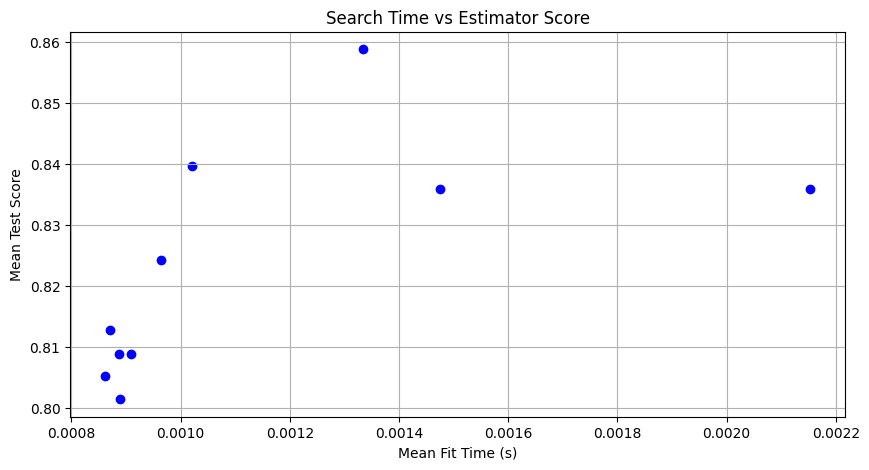

In [54]:
plt.figure(figsize=(10, 5))

# Scatter plot: mean fit time vs mean test score
plt.scatter(results['mean_fit_time'], results['mean_test_score'], c='blue', marker='o')

plt.xlabel('Mean Fit Time (s)')
plt.ylabel('Mean Test Score')
plt.title('Search Time vs Estimator Score')
plt.grid(True)
plt.show()

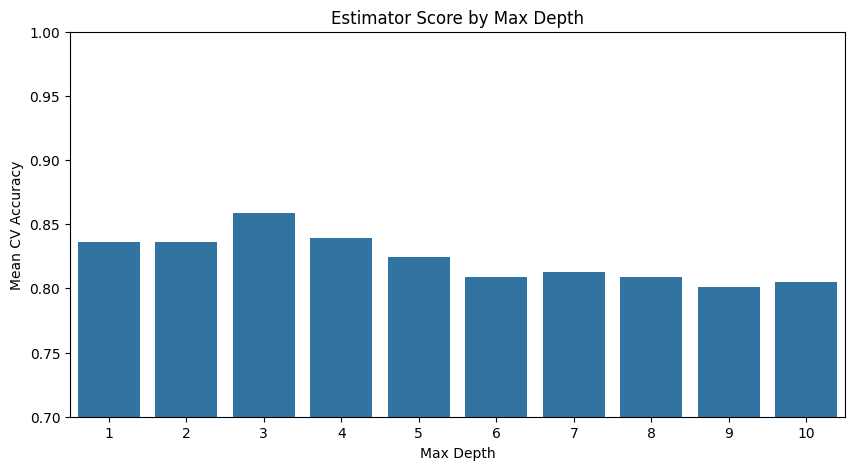

In [60]:
import seaborn as sns

# Example with 'param_max_depth'
plt.figure(figsize=(10, 5))
sns.barplot(x='param_max_depth', y='mean_test_score', data=results)

plt.xlabel('Max Depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Estimator Score by Max Depth')

plt.ylim(0.7, 1.0)
plt.show()